#### Water Potability Prediction Project: Lifecycle of Machine Learning Project
#### Main Aim: 
* The primary goal of this project is to predict whether water is potable (safe to drink) or not using machine learning (ML) and Auto ML techniques.

#### 1) Problem Statement:
* Contaminated water is a major issue worldwide, linked to several waterborne diseases. The objective of this project is to build a machine learning model that predicts the potability of water, determining whether it is safe for human consumption or not. By using ML and Auto ML algorithms, we aim to create a model that assists in real-time water quality assessments.

#### In this project:

* We will build a classification model that predicts the potability of water using data on various water quality parameters (e.g., pH, hardness, solids).
* This model can be utilized by water treatment facilities, environmental organizations, and health departments to make quick, data-driven decisions on water quality.

#### 2) Data Collection:
* The dataset includes several water quality parameters such as:
* pH: Measures how acidic or basic the water is.
* Hardness: Reflects the concentration of calcium and magnesium ions in water.
* Solids: Total dissolved solids (TDS) present in the water.
* Chloramines: Amount of chloramine used in the water treatment process.
* Sulfate, Conductivity, Organic Carbon, Trihalomethanes, Turbidity, Potability (target variable).

#### 3) Exploratory Data Analysis (EDA):
* The dataset undergoes analysis to understand its structure, distribution, and any anomalies. EDA helps in detecting outliers, missing values, and understanding relationships between variables.

* Correlation Heatmap: Visualizes the relationship between variables, showing how strongly different water quality parameters correlate with each other. For example, a high correlation between 'Hardness' and 'Solids' suggests these variables move together.

* Boxplots and Density Plots: Used to understand the distribution of key variables such as pH, hardness, solids, and chloramines. These help in identifying potential outliers in the data.

* Scatter Matrix: Visualizes pairwise relationships between variables, helping to spot trends and patterns.

#### 4) Data Cleaning and Preprocessing:
* Handling missing values, removing outliers, and transforming the data for model training. This step includes scaling numerical features to ensure they are on the same range and encoding categorical features, if any.

#### 5) Model Building:
* Using machine learning techniques, we aim to build predictive models to classify water potability based on given features.

#### Machine Learning Algorithms:
* Logistic Regression
* Random Forest Classifier
* Gradient Boosting Machines (GBM)
* Decision Trees
* Support Vector Machines (SVM)
* Auto ML with H2O: Auto ML automates the process of selecting the best algorithm and hyperparameters, allowing non-experts to use machine learning effectively.

#### 6) Model Evaluation:
* Evaluating model performance using key metrics like accuracy, precision, recall, F1-score, and ROC-AUC. This allows us to compare the performance of different models and choose the best one for deployment.

* Confusion Matrix: Helps visualize the performance of the classification model, showing true positives, true negatives, false positives, and false negatives.

* ROC-AUC Curve: Measures the trade-off between true positive rate and false positive rate, giving insights into how well the model distinguishes between potable and non-potable water.

* Test Accuracy Score: The model's test accuracy reflects how well the model generalizes to unseen data.

#### Timeline of the Project:
* Data Analysis: Understand relationships and distributions.
* Feature Engineering: Process the data before feeding it to the model.
* Model Building: Use both ML and Auto ML techniques to train models.

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [3]:
df = pd.read_csv('drinking_water_potability.csv')
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

**Loading the DataSet**

In [4]:
df.fillna(df.mean())

ph    Hardness       Solids  Chloramines     Sulfate  \
0     7.080795  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246  333.775777   
2     8.099124  224.236259  19909.54173     9.275884  333.775777   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362  333.775777   
3273  9.419510  175.762646  33155.57822     7.350233  333.775777   
3274  5.126763  230.603758  11983.86938     6.303357  333.775777   
3275  7.874671  195.102299  17404.17706     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436525       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459761       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

**Shape of the dataset**

In [5]:
df.shape

(3276, 10)

**Summary of the dataset**

In [6]:
# Display summary statistics for a dataframe
df.describe()


ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792305       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

### Data Analysis

<Axes: xlabel='Potability', ylabel='count'>

Potability
0    1998
1    1278
Name: count, dtype: int64

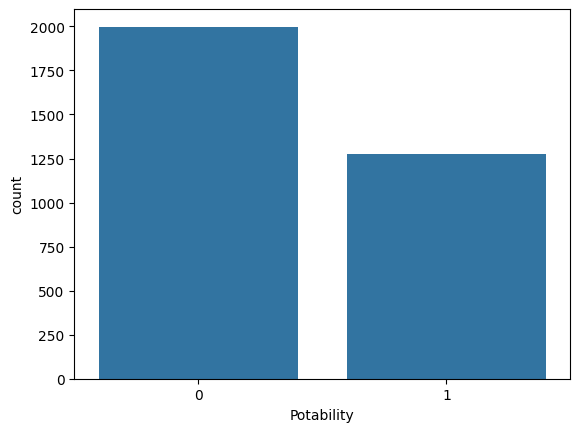

In [9]:
sns.countplot(data=df, x=df.Potability)
df.Potability.value_counts()

**Insights**
##### Objective:
* The plot displays the count of water samples categorized by their potability (whether the water is potable or not). The goal is to understand the distribution of water samples that are deemed potable versus those that are not.

##### Key Insights:
* Water Quality is a Major Concern:
The high count of non-potable samples indicates that ensuring water safety should be a key focus. Identifying the contaminants or factors making water non-potable would be important for improving water safety.

* Need for Improving Potability:
With fewer potable samples, it would be beneficial to focus on interventions that can increase the proportion of safe drinking water, whether through filtration, treatment, or better source management.

In [10]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### Handling Null Values

In [11]:
null= ['ph', 'Sulfate', 'Trihalomethanes']

C:\Users\danie\AppData\Local\Temp\ipykernel_2032\200377003.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


<Axes: xlabel='ph', ylabel='Density'>

C:\Users\danie\AppData\Local\Temp\ipykernel_2032\200377003.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


<Axes: xlabel='Sulfate', ylabel='Density'>

C:\Users\danie\AppData\Local\Temp\ipykernel_2032\200377003.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


<Axes: xlabel='Trihalomethanes', ylabel='Density'>

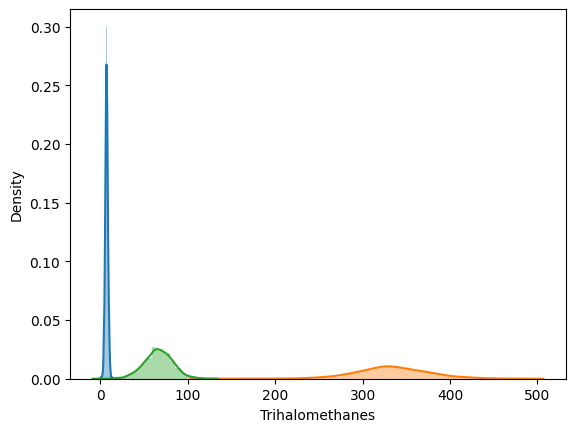

In [12]:
for i in null:
    sns.distplot(df[i])

**Insights**
##### Objective:
*  The density plot shows the distribution of Trihalomethane (THM) levels in water samples. Trihalomethanes are chemical compounds that can form as a byproduct of water disinfection processes, such as chlorination. The goal of this analysis is to understand the distribution of THM levels in the dataset and assess potential concerns regarding water safety

##### Key Insights:
* Predominantly Low Levels of THMs:
Most water samples have low THM concentrations, which is a good sign of effective water treatment. However, attention is needed to address the samples with higher concentrations.

* Presence of Moderate and High THMs:
The cluster of samples in the 50-100 ppb range indicates potential water safety concerns. These levels should be monitored to ensure compliance with safety standards.

* Outliers with Extremely High THMs:
The small number of samples with extremely high THM levels (300+ ppb) should be further investigated to determine the cause of this contamination and ensure that these levels do not pose a risk to public health.

C:\Users\danie\AppData\Local\Temp\ipykernel_12300\1104780343.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.ph)


<Axes: xlabel='ph', ylabel='Density'>

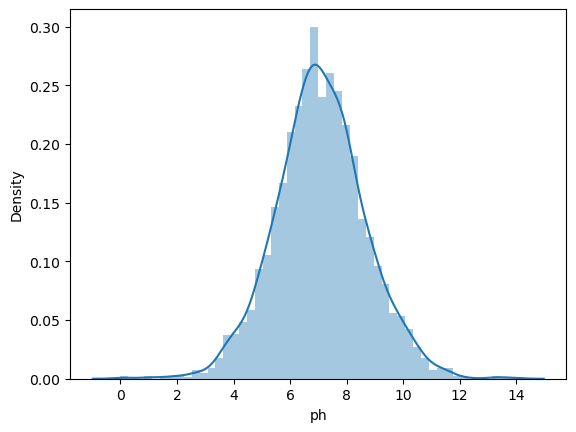

In [12]:
sns.distplot(df.ph)

**Insights**
##### Objective:
* The plot shows the distribution of pH levels in the water samples. pH is an important water quality parameter that indicates how acidic or basic the water is. The goal is to assess the pH range of the water samples in the dataset and understand whether the water is within acceptable pH levels for drinking.

##### Observations:

##### Normal Distribution:
* The distribution of pH appears to be bell-shaped, with a peak near pH 7, which is the neutral point. This suggests that the pH of most water samples is close to neutral.

* The distribution is slightly skewed to the left, meaning that there are more water samples with slightly acidic pH compared to basic pH.

##### Concentration Around Neutral pH:
* The highest density occurs near pH 7-8, which is within the neutral or slightly basic range. This is typically the ideal range for potable (drinkable) water.

* A smaller number of water samples fall outside the range of pH 6-9, suggesting that most of the water samples are neither highly acidic nor highly basic.


##### Few Extreme pH Values:
* There are a few water samples with very low pH values (below pH 4) and a few with high pH values (above pH 10). These outliers could indicate potential contamination or water quality issues in those specific samples.


In [13]:
df['ph'] = df['ph'].replace(np.nan, df.ph.mean())

C:\Users\danie\AppData\Local\Temp\ipykernel_2032\2561706797.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Sulfate)


<Axes: xlabel='Sulfate', ylabel='Density'>

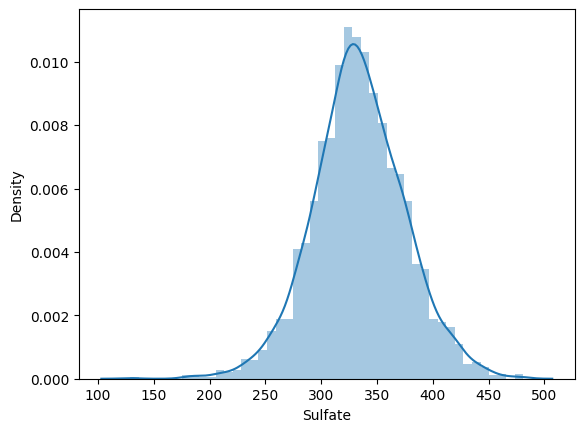

In [14]:
sns.distplot(df.Sulfate)

**Insights**
##### Objective:
* The density plot represents the distribution of sulfate concentrations in the water samples. Sulfate is a naturally occurring mineral in water, and while it is not harmful in low concentrations, elevated levels can affect water taste or even pose health risks. The goal is to assess the range and distribution of sulfate levels in the dataset.

##### Observations:

##### Normal Distribution:
* The plot follows a normal distribution, with the peak concentration around 300 mg/L. This bell-shaped distribution indicates that most of the water samples have sulfate concentrations centered around this value.

##### Symmetry in Distribution:
* The distribution appears symmetrical, with an equal spread on both sides of the peak concentration. This indicates a balanced distribution of sulfate levels around the mean, with very few samples showing extreme deviations.

##### Range of Sulfate Concentrations:
* The sulfate concentrations range from approximately 150 mg/L to 500 mg/L, with most samples falling between 250 mg/L and 400 mg/L.

* There are very few samples with sulfate concentrations below 200 mg/L or above 450 mg/L, indicating that extreme sulfate levels are rare in this dataset.

In [15]:
df['Sulfate'] = df['Sulfate'].replace(np.nan,df.Sulfate.mean())

C:\Users\danie\AppData\Local\Temp\ipykernel_2032\2688979263.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Trihalomethanes)


<Axes: xlabel='Trihalomethanes', ylabel='Density'>

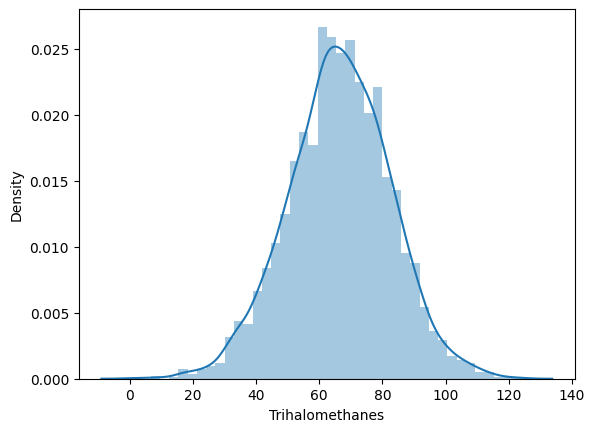

In [16]:
sns.distplot(df.Trihalomethanes)

**Insights**
##### Objective:
* The plot illustrates the distribution of Trihalomethane (THM) levels in water samples. Trihalomethanes are a group of chemicals formed during water treatment processes, particularly when chlorine is used for disinfection. The aim is to understand the typical THM levels across the samples and to assess whether any outliers or unsafe levels of THMs are present.

##### Observations:
##### Normal Distribution:
* The distribution follows a normal (bell-shaped) curve, with the peak concentration around 60 ppb. This suggests that the majority of water samples have THM concentrations centered around this value.

##### Symmetry in the Distribution:
* The plot appears to be symmetrical, with an equal spread on both sides of the peak concentration. This indicates a balanced distribution of THM levels in the water samples.

##### Range of THM Levels:
* THM concentrations range from near 0 ppb to approximately 120 ppb, with most samples concentrated between 40 ppb and 80 ppb.
* Few samples fall below 20 ppb or exceed 100 ppb, indicating that extreme THM levels are rare.



In [17]:
df['Trihalomethanes'] = df['Trihalomethanes'].replace(np.nan,df.Trihalomethanes.mean())

In [18]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

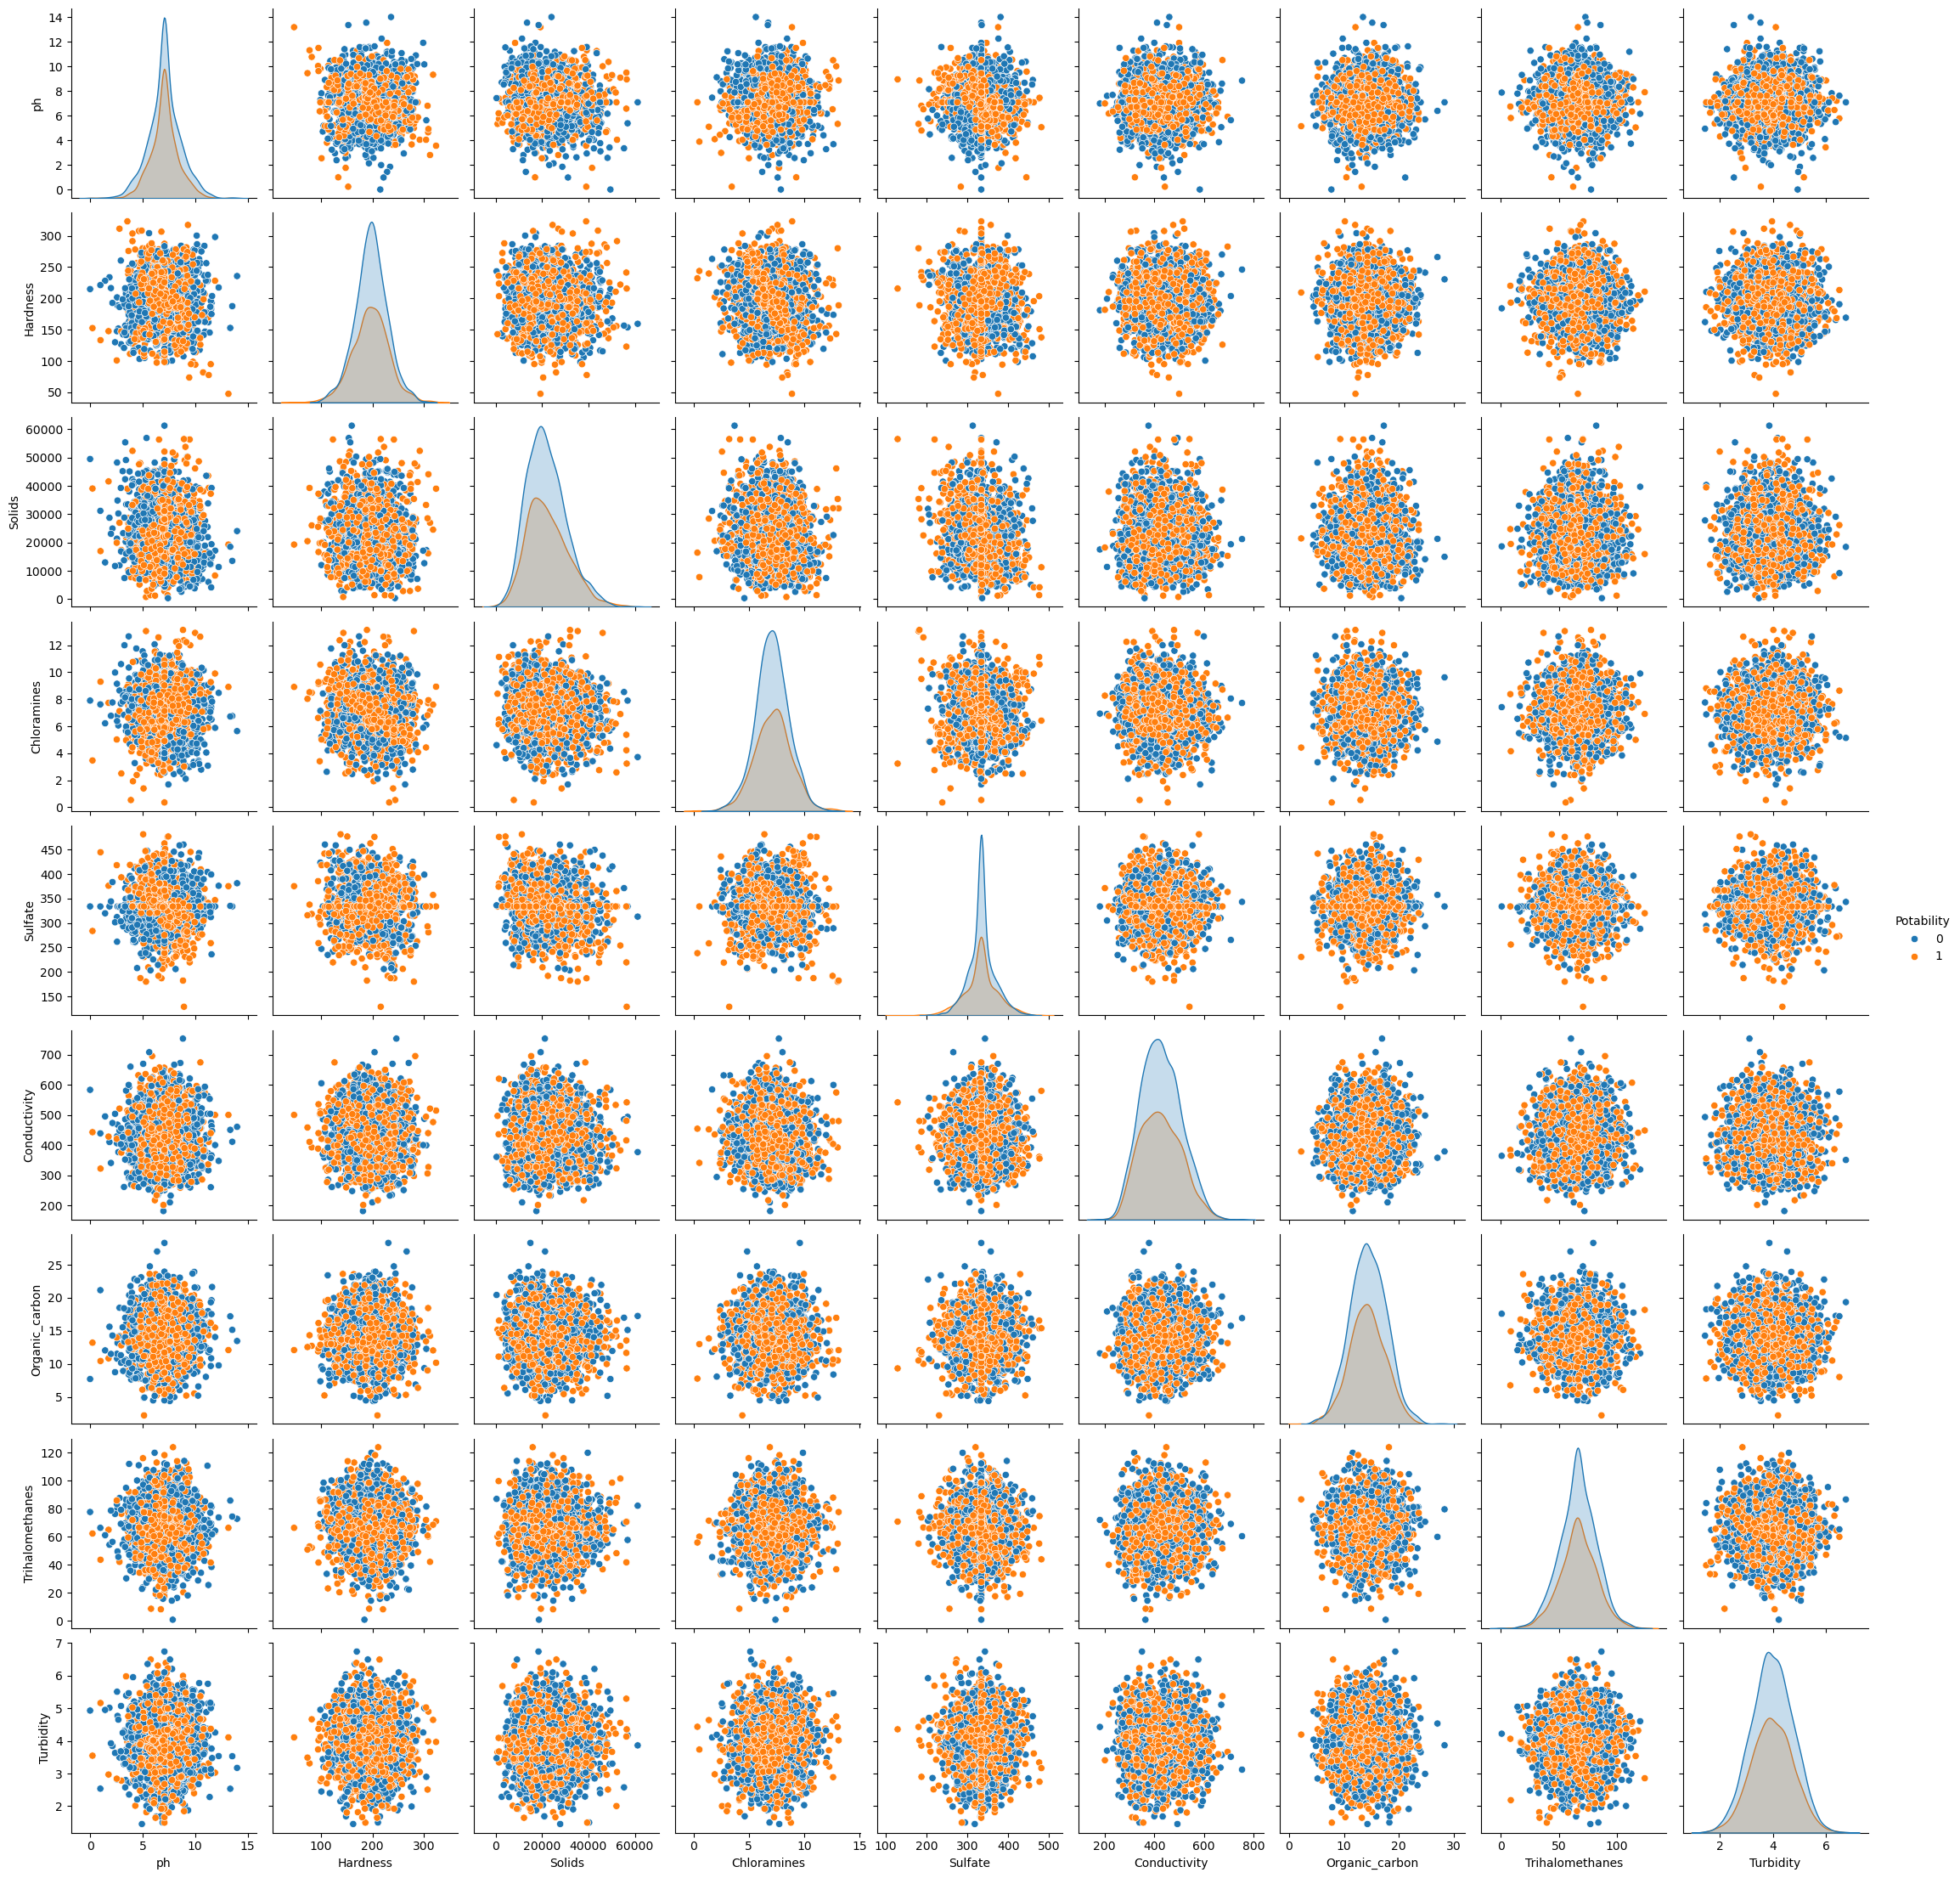

In [19]:
sns.pairplot(data=df,hue='Potability')

**Insights**
##### Objective:
* The objective of the pair plot is to examine the relationships and potential correlations between multiple water quality variables (such as pH, sulfate, conductivity, etc.) and how these relationships differ based on potability (whether the water is safe to drink or not).

##### Observations:
##### Visual Insights from the Pair Plot:
##### Diagonal Plots (KDE for Individual Features):
* The diagonal plots show the distribution (density plots) of each feature.
For example, the pH shows a peak near 7-8, indicating that most water samples have pH values in that range. Similarly, Trihalomethanes show a peak around 60 ppb.

##### Scatter Plots for Pairwise Relationships:
* The scatter plots show pairwise relationships between variables, with the color of the points representing potability (blue for non-potable and orange for potable).

* No Strong Correlations: Most of the scatter plots show that there are no clear linear relationships between any two water quality parameters. The points are mostly scattered, indicating low or no correlation between these pairs.

* Trihalomethanes vs pH: There might be a weak pattern or separation between potable and non-potable water for certain pairs of variables, such as Trihalomethanes vs pH, where potable water (orange) appears to cluster differently than non-potable water (blue).

* Sulfate vs Conductivity: Similarly, for Sulfate vs Conductivity, there appears to be some clustering of potable vs non-potable water, but it is not strong or clearly defined.

##### Clusters of Potability:
In most scatter plots, the blue (non-potable) and orange (potable) dots are intermixed, which suggests that there isn’t a strong differentiation between the two categories for individual water quality parameters.




<Figure size 640x480 with 0 Axes>

<Axes: >

<Figure size 640x480 with 0 Axes>

<Axes: >

<Figure size 640x480 with 0 Axes>

<Axes: >

<Figure size 640x480 with 0 Axes>

<Axes: >

<Figure size 640x480 with 0 Axes>

<Axes: >

<Figure size 640x480 with 0 Axes>

<Axes: >

<Figure size 640x480 with 0 Axes>

<Axes: >

<Figure size 640x480 with 0 Axes>

<Axes: >

<Figure size 640x480 with 0 Axes>

<Axes: >

<Figure size 640x480 with 0 Axes>

<Axes: >

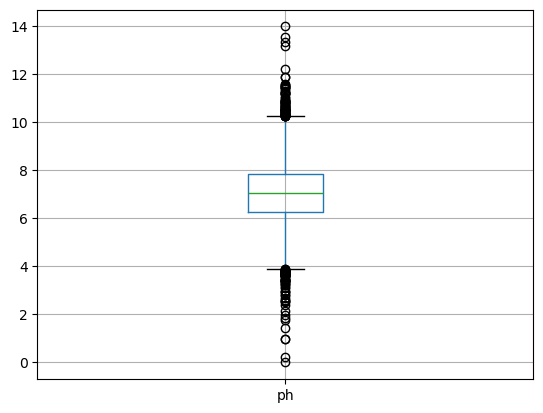

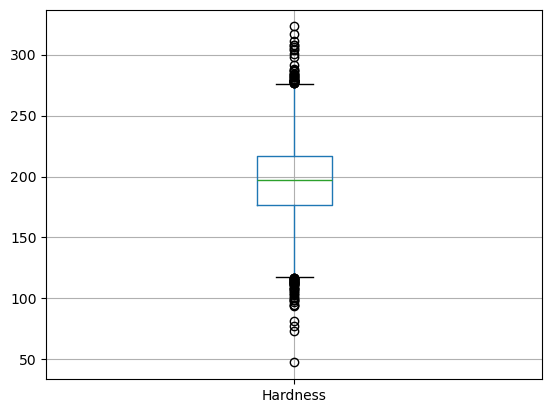

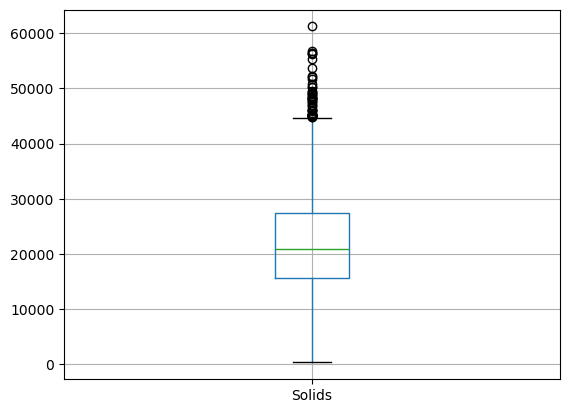

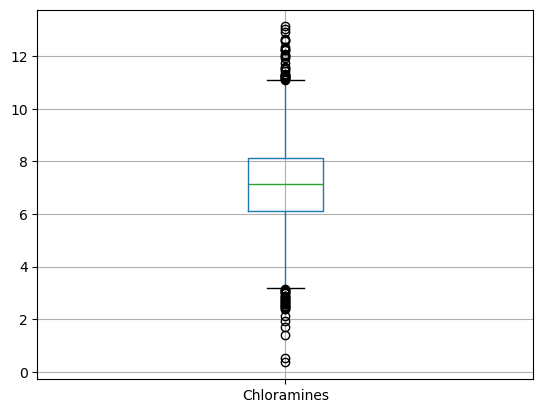

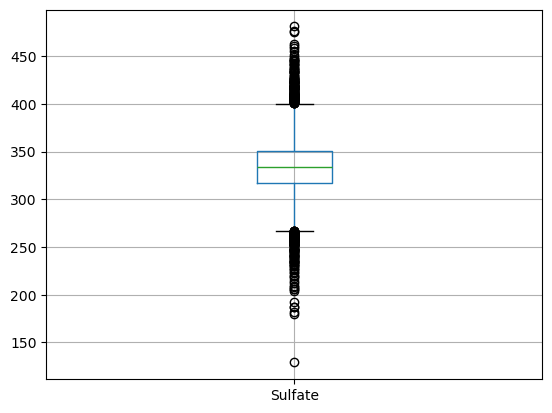

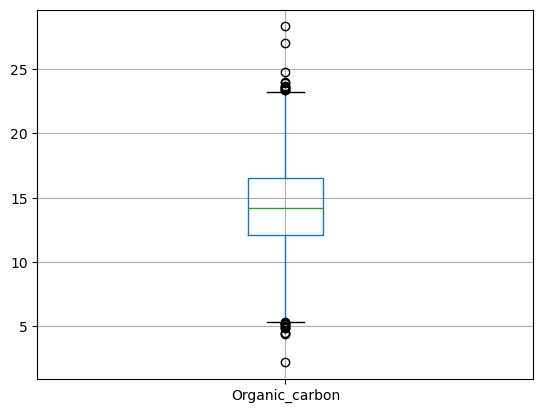

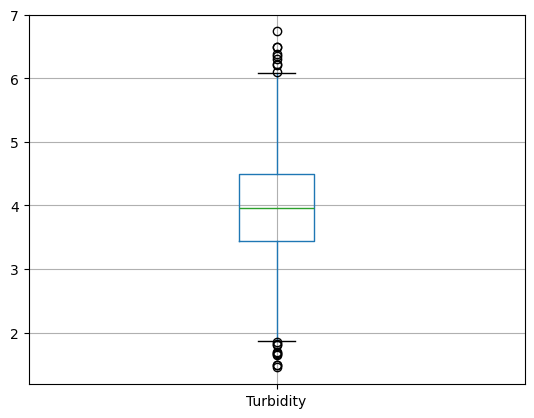

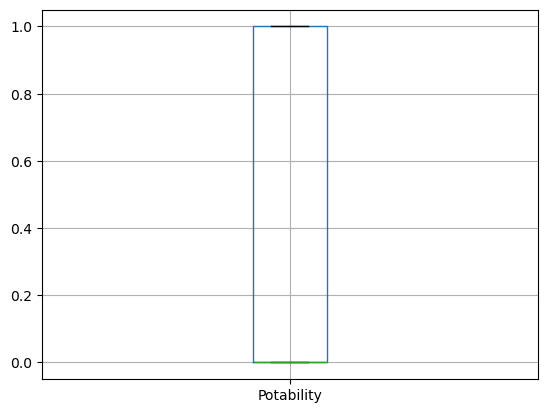

In [20]:
for column in df.columns:
    plt.figure()
    df.boxplot([column])

`**PH Insights**`
##### Objective:
* The boxplot represents the distribution of pH levels in the water samples, including central tendency, spread, and the presence of outliers. The goal is to assess the typical pH range of the water samples and identify any extreme values.

##### Key Variable:
pH: A measure of how acidic or basic the water is. A pH value below 7 indicates acidity, above 7 indicates basicity, and 7 is neutral.

##### Observations:
##### Central Tendency (Median):
* The median pH value is 7, which is neutral. This indicates that most water samples have a pH level that is balanced and within a safe range for drinking.

##### Interquartile Range (IQR):
* The box in the plot represents the interquartile range (IQR), which captures the middle 50% of the data. For pH, the IQR lies approximately between 6.2 and 7.9.

* This suggests that the water is generally well-balanced and likely suitable for many uses, though samples toward the edges of the IQR might warrant closer monitoring to ensure water quality meets specific safety standards.

##### Outliers:
* There are numerous outliers above and below the whiskers (lines extending from the box), indicating that a significant number of water samples have extreme pH values.

* Low Outliers: Many samples have very low pH values, with some below pH 3. These highly acidic samples could potentially pose health risks or indicate contamination.

* High Outliers: There are also samples with pH values above 10, indicating highly basic water, which might also pose risks for consumption or usability.

##### Whiskers (Range of Data):
* The whiskers extend from approximately 4.5 to 9.5, capturing most of the non-outlier data. This range suggests that water samples generally span from slightly acidic to moderately basic, which is acceptable for most uses.

`**Hardness Insights**`
##### Objective:
* The boxplot represents the distribution of water hardness, including central tendency, spread, and the presence of outliers. Water hardness measures the concentration of calcium and magnesium ions, which affect water quality and usability.

##### Observations:
##### Central Tendency (Median):
* The median hardness value is approximately 200 units, which indicates moderately hard water. This suggests that most of the water samples fall within a typical range for hardness.

##### Interquartile Range (IQR):
* The IQR for hardness lies approximately between 175 and 225 units, capturing the middle 50% of the data. This range represents moderate to hard water, generally considered acceptable for domestic use, although harder water may cause scaling in pipes and appliances.

##### Outliers:
* There are several outliers below 100 and above 250 units.
Low Outliers: Water samples with hardness below 100 units indicate soft water, which may be more suitable for washing but could lack essential minerals.

* High Outliers: Samples above 250 units indicate very hard water, which might cause scaling and require water softening treatment.

##### Whiskers (Range of Data):
* The whiskers extend from approximately 50 to 300 units, indicating that most water samples have hardness levels within this range. This is a typical spread for water hardness.

`**Solids Insights**`
##### Objective:
* The boxplot displays the distribution of solid content in water samples. Solids in water, including dissolved minerals and salts, can affect taste and safety.

##### Observations:
##### Central Tendency (Median):
* The median solids concentration is around 20,000 mg/L. This suggests that the typical water sample contains a moderate concentration of dissolved solids, which may affect the taste but might not pose significant health risks unless concentrations are extreme

##### Interquartile Range (IQR):
* The IQR, represented by the box, captures the middle 50% of the data, approximately between 15,000 mg/L and 28,000 mg/L. This range indicates the normal variability in dissolved solid concentrations across the majority of samples.

##### Outliers:
* High Outliers: There are numerous high outliers above the upper whisker, extending up to nearly 60,000 mg/L. These extremely high levels of solids could indicate water that is too mineral-rich, potentially making it unsuitable for drinking without treatment.

* Low Outliers: There are very few low outliers, suggesting that most water samples have at least a moderate level of dissolved solids.

##### Whiskers (Range of Data):
* The whiskers extend from approximately 0 to 45,000 mg/L, indicating that most of the dissolved solid content falls within this range. This suggests a fairly wide spread in the data, with most samples containing moderate to high levels of solids.

`**Chloramines Insights**`
##### Objective:
* The boxplot illustrates the distribution of chloramine levels in water samples. Chloramines are disinfectants used to treat drinking water and maintain safe water quality.

##### Observations:
##### Central Tendency (Median):
* The median chloramine concentration is approximately 7 units, suggesting that most water samples have chloramine levels within an acceptable range for disinfection.

##### Interquartile Range (IQR):
* The IQR for chloramines lies between 6.2 and 8 units. This range indicates that most water samples have effective disinfectant levels, although higher levels could affect water taste.

##### Outliers:
* There are several outliers with ph as low as 0 to 4 and above 10 units.

* Low Outliers: Chloramine levels below 3 may indicate insufficient disinfection, potentially compromising water safety.

* High Outliers: Levels above 11 units could affect the taste and odor of the water and might be harmful if consumed.

##### Whiskers (Range of Data):
The whiskers extend from 0 to 12 units, representing the typical range of chloramine levels in water samples.

`**Sulfate Insights**`
##### Objective:
* The boxplot depicts the distribution of sulfate concentration in water samples. Sulfates occur naturally and can affect the taste of water and cause scaling in pipes.

##### Observations:
##### Central Tendency (Median):
* The median sulfate level is approximately 340 units, suggesting moderate sulfate levels in most water samples.

##### Interquartile Range (IQR):
* The IQR for sulfate lies between 325 and 350 units, indicating that most water samples have sulfate concentrations within a moderate range. This suggests that water quality is generally acceptable, although higher levels may cause scaling.

##### Outliers:
* There are several outliers with units between 125 and above 400 units.

* Low Outliers: These represent unusually low sulfate levels with units as low as 275 to 175, which may not significantly affect water quality.

* High Outliers: Higher sulfate concentrations could cause water to have a bitter taste and lead to pipe scaling, the units here are above 400.

##### Whiskers (Range of Data):
* The whiskers extend from 125 to above 450 units, representing the typical spread of sulfate concentrations in water samples.

`**Conductivity Insights**`
##### Objective:
* This boxplot visualizes the distribution of conductivity levels in water, which measures the ability of water to conduct electricity, indicating ion concentration.

##### Observations:
##### Central Tendency (Median):
* The median conductivity level is approximately 420 units, indicating moderate ion concentration in most water samples.

##### Interquartile Range (IQR):
* The IQR for conductivity is between 380 and 490 units, capturing the middle 50% of the water samples. This suggests that most water samples have moderate conductivity levels.

##### Outliers:
* There are several outliers above 650 and below 200 units.

* Low Outliers: Water samples with conductivity below 200 units may indicate low mineral content, possibly affecting taste or mineral balance.

* High Outliers: Samples with conductivity above 650 units suggest high levels of dissolved ions, potentially affecting water quality and taste.

##### Whiskers (Range of Data):
* The whiskers extend from approximately 200 to above 700 units, indicating a typical spread of conductivity levels in the water.

`**Organic Carbon Insights**`
##### Objective:
* The boxplot illustrates the distribution of organic carbon in the water samples. Organic carbon indicates the presence of organic compounds in water, which can impact water quality and microbial growth.

##### Observations:
##### Central Tendency (Median):
* The median value for organic carbon is approximately 14 units, suggesting moderate levels of organic material in most water samples.

##### Interquartile Range (IQR):
* The IQR for organic carbon lies between 13 and 17 units, capturing the majority of the water samples. This suggests that most samples have acceptable levels of organic compounds.

##### Outliers:
* There are several outliers below 5 and above 24 units.

* Low Outliers: These represent samples with unusually low organic carbon content, possibly indicating less organic material.

* High Outliers: Higher organic carbon levels might suggest contamination or increased microbial growth potential.

##### Whiskers (Range of Data):
* The whiskers extend from 0 to 30 units, representing the typical range of organic carbon in the water samples.

`**Trihalomethanes Insights**`
##### Objective:
* The boxplot represents the distribution of trihalomethanes, which are byproducts of chlorination. High levels of trihalomethanes can pose health risks.

##### Observations:
##### Central Tendency (Median):
* The median trihalomethane concentration is around 70 units, indicating moderate levels in most water samples.

##### Interquartile Range (IQR):
* The IQR for trihalomethanes is between 58 and 77 units, capturing the middle 50% of the data. This suggests that most water samples have trihalomethane levels within a safe range, though further monitoring may be required for health and safety.

##### Outliers:
* There are numerous outliers below 30 and above 105 units.

* Low Outliers: These samples have low trihalomethane levels, which may suggest less chemical disinfection or cleaner water sources.

* High Outliers: High concentrations of trihalomethanes could pose health risks, as prolonged exposure to high levels is associated with adverse health effects.

#### Whiskers (Range of Data):
* The whiskers extend from 0 to 120 units, indicating the range of typical trihalomethane concentrations.

`**Turbidity Insights**`
##### Objective:
* This boxplot shows the distribution of turbidity in water samples. Turbidity measures the cloudiness of water, which can indicate the presence of suspended particles.

##### Observations:
##### Central Tendency (Median):
* The median turbidity level is around 4, indicating moderate clarity in most water samples.

##### Interquartile Range (IQR):
* The IQR for turbidity is between 3.5 and 4.5 units, capturing the middle 50% of the data. This suggests that most water samples are relatively clear.

##### Outliers:
* Low Outliers: These represent samples with turbidity levels below 2, indicating very clear water with few suspended particles, which is typically considered good for drinking.

* High Outliers: Samples with turbidity levels above 6 units may indicate increased cloudiness, possibly due to contamination or high levels of suspended solids. These samples may require further investigation to ensure safety for consumption.

###### Whiskers (Range of Data):
* The whiskers extend from approximately 0 to 7 units, representing the typical range of turbidity levels. Most samples fall within this range, suggesting that the water is generally clear and suitable for consumption.

`**Potability Insights**`
###### Objective:
* The boxplot illustrates the distribution of the binary variable "potability," which indicates whether the water is considered potable (safe to drink).

###### Key Variable:
* Potability: A binary variable indicating whether the water is drinkable (1) or not drinkable (0).

##### Observations:
##### Central Tendency (Median):
* Since this is a binary variable, the median value is either 0 or 1. In this case, most of the samples are non-potable (0).

##### Interquartile Range (IQR):
* There is no IQR in this case since it’s a binary variable.

##### Outliers:
* The boxplot doesn’t display any outliers, as it simply shows the distribution of potable vs non-potable water samples.

##### Whiskers (Range of Data):
* The whiskers span from 0 to 1, covering the full range of the binary potability variable. This boxplot clearly shows that there are more non-potable samples than potable ones.


In [21]:
df.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075833 -0.081884    -0.031811  0.014403   
Hardness         0.075833  1.000000 -0.046899    -0.030054 -0.092766   
Solids          -0.081884 -0.046899  1.000000    -0.070148 -0.149840   
Chloramines     -0.031811 -0.030054 -0.070148     1.000000  0.023791   
Sulfate          0.014403 -0.092766 -0.149840     0.023791  1.000000   
Conductivity     0.017192 -0.023915  0.013831    -0.020486 -0.014059   
Organic_carbon   0.040061  0.003610  0.010242    -0.012653  0.026909   
Trihalomethanes  0.002994 -0.012690 -0.008875     0.016627 -0.025605   
Turbidity       -0.036222 -0.014449  0.019546     0.002363 -0.009790   
Potability      -0.003287 -0.013837  0.033743     0.023779 -0.020619   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017192        0.040061         0.002994  -0.036222   
Hardness            -0.023915        0.003610        -0.012690  -0.014449   
Solids               0.013831        0.010242        -0.008875   0.019546   
Chloramines         -0.020486       -0.012653         0.016627   0.002363   
Sulfate             -0.014059        0.026909        -0.025605  -0.009790   
Conductivity         1.000000        0.020966         0.001255   0.005798   
Organic_carbon       0.020966        1.000000        -0.012976  -0.027308   
Trihalomethanes      0.001255       -0.012976         1.000000  -0.021502   
Turbidity            0.005798       -0.027308        -0.021502   1.000000   
Potability          -0.008128       -0.030001         0.006960   0.001581   

                 Potability  
ph                -0.003287  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.020619  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.006960  
Turbidity          0.001581  
Potability         1.000000

`**Insights**`
##### Objective:
* The purpose of this correlation matrix is to examine the relationships between various water quality parameters, such as pH, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic Carbon, Trihalomethanes, Turbidity, and Potability. By analyzing the strength and direction of these relationships, we aim to understand how changes in one variable might influence others, especially how these factors impact potability

##### Key Variables:
* The correlation values range from -1 to 1. Positive values indicate that two variables increase together, while negative values suggest that as one increases, the other decreases. A value of 0 indicates no correlation

##### Analysis:
##### pH:
* Shows a weak positive correlation with Hardness (0.075) and Organic Carbon (0.04), meaning that as pH increases, these parameters also increase slightly.

* There is a weak negative correlation with Solids (-0.081), suggesting that higher pH values are associated with slightly lower levels of dissolved solids.

* pH has almost no correlation with Potability (-0.003), indicating pH alone might not be a strong predictor of water safety for consumption.

##### Hardness:
* Weak positive correlation with pH (0.075) and weak negative correlation with Sulfate (-0.092), implying that harder water tends to have lower sulfate concentrations.

* Weak negative correlation with Potability (-0.013), indicating that water hardness might not significantly influence potability.

##### Solids:
* Weak negative correlation with Sulfate (-0.149), meaning water samples with higher levels of solids tend to have slightly lower sulfate levels.

* Positive but weak correlation with Potability (0.034), suggesting that higher levels of dissolved solids might slightly increase the likelihood of water being potable.

##### Chloramines:
* Weak negative correlation with Solids (-0.070) and a weak positive correlation with Trihalomethanes (0.016), indicating that as chloramine levels increase, so do the levels of certain disinfection by-products.

* Positive but very weak correlation with Potability (0.024), suggesting that higher chloramine levels are slightly associated with potable water.

##### Sulfate:
* The strongest negative correlation is with Solids (-0.149), suggesting an inverse relationship between sulfate levels and dissolved solids.

* Weak negative correlation with Potability (-0.021), implying sulfate concentration has little effect on whether the water is safe to drink.

##### Conductivity:
* Very weak correlations with most variables but a weak positive correlation with Solids (0.014), suggesting that higher conductivity values may be associated with higher levels of dissolved solids.

* Conductivity has a weak negative correlation with Potability (-0.008), indicating that higher conductivity is slightly associated with less potable water.

##### Organic Carbon:
* Weak positive correlation with Sulfate (0.026), suggesting that higher organic carbon levels tend to coexist with slightly higher sulfate levels.

* Weak negative correlation with Potability (-0.03), indicating that higher organic carbon levels might make water less potable.

##### Trihalomethanes:
* Very weak correlations with all variables, showing minimal relationships with factors such as Sulfate and Chloramines.

* Very weak positive correlation with Potability (0.006), suggesting that trihalomethanes have little impact on the potability of the water.

##### Turbidity:
* Weak positive correlation with Solids (0.019), indicating that higher levels of suspended solids slightly increase water turbidity.

* Weak positive correlation with Potability (0.001), suggesting turbidity has almost no influence on water potability.

##### Potability:
* The highest positive correlation is with Solids (0.034), indicating that higher levels of dissolved solids may slightly improve the chances of water being potable.

* Most correlations with Potability are weak, suggesting that no single factor among these variables strongly determines whether water is safe for drinking.

<Figure size 6000x3000 with 0 Axes>

<Axes: >

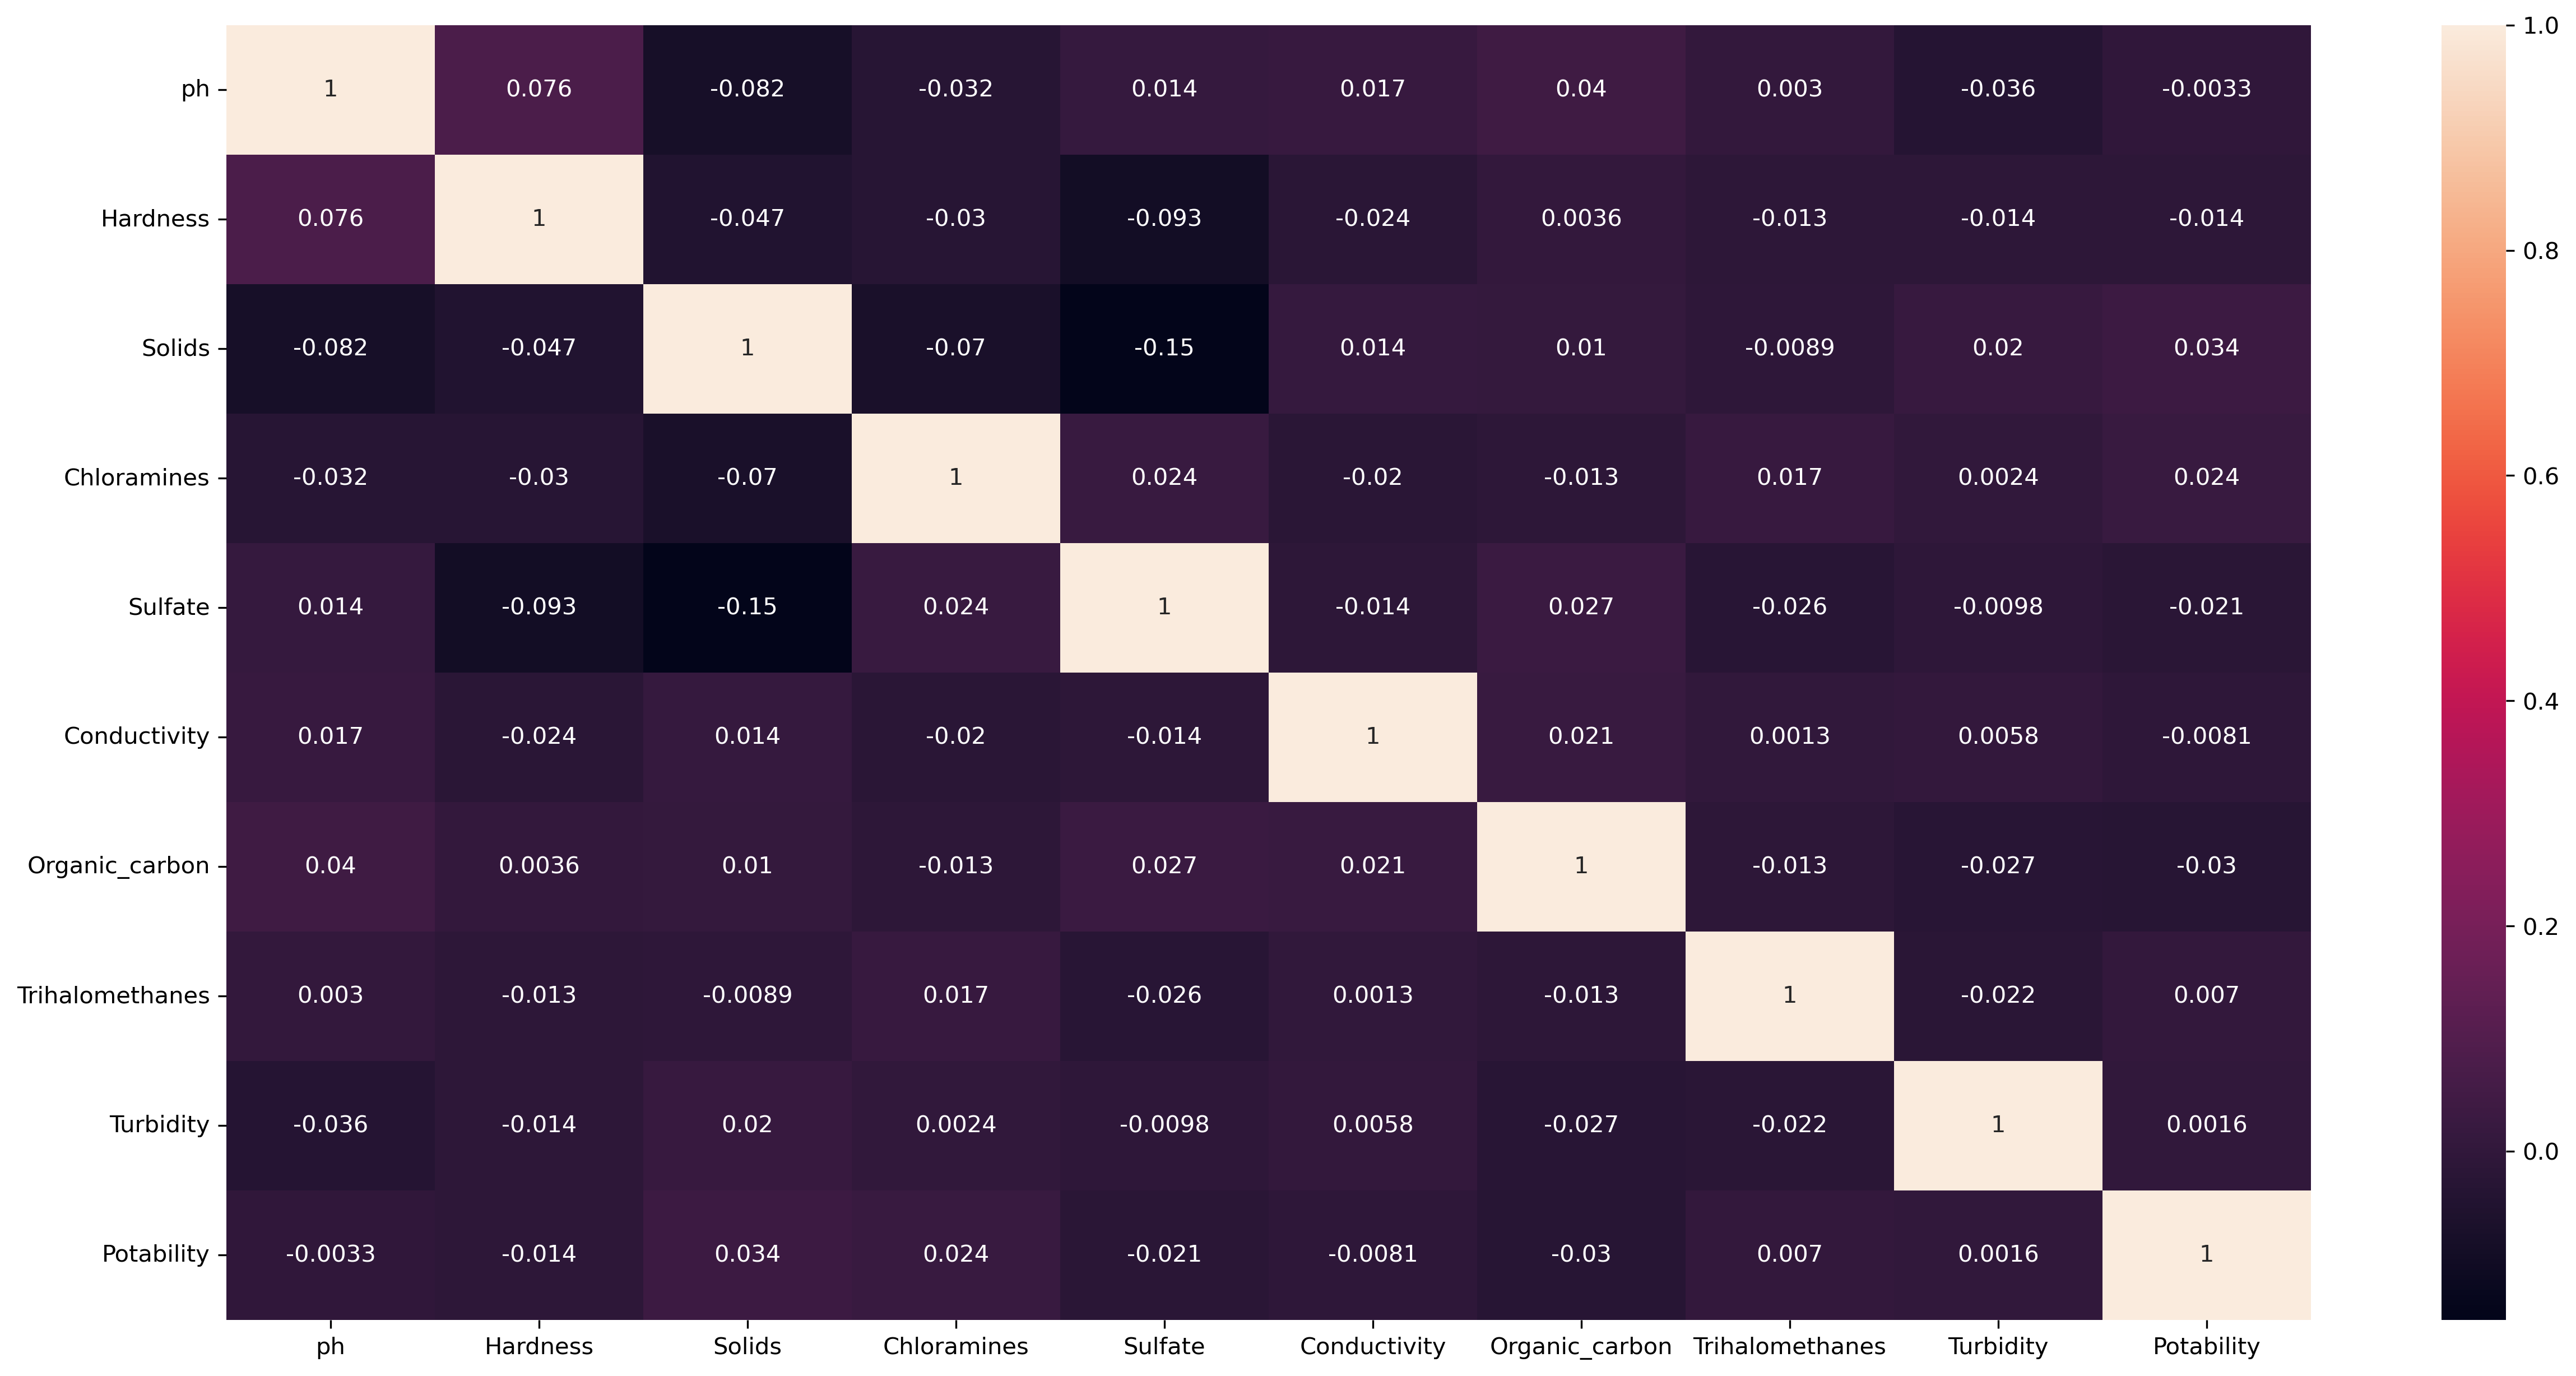

In [22]:
plt.figure(figsize=(20, 10), dpi=300)  # Increase dpi for better resolution
sns.heatmap(df.corr(), annot=True)

`**Insights**`
##### Objective:
* The heatmap visualizes the correlations between various water quality parameters and how they relate to potability. This helps to identify the strength and direction of relationships between these variables, guiding us in understanding how different factors interact with water potability.

##### Key Insights:
* Solids and Sulfate show the strongest positive correlations with Potability, but these relationships are weak.

* pH, Hardness, Turbidity, and Chloramines show little to no significant correlation with Potability, suggesting that these factors alone are insufficient to predict water safety.

* The weak correlations between most variables imply that multiple factors likely contribute to water potability, but none of these single variables has a dominant influence based on this dataset.

## Feature Engineering

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
x=df.drop(['Potability'],axis=1)
y=df.Potability


In [24]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

In [25]:
Ext = ExtraTreesClassifier()
Ext.fit(x,y)

ExtraTreesClassifier()

In [26]:
print(Ext.feature_importances_)

[0.12528477 0.11894065 0.11216538 0.11299076 0.1254972  0.10106919
 0.10145316 0.10182993 0.10076895]


In [27]:
feature = pd.Series(Ext.feature_importances_,index=x.columns)
feature.sort_values(ascending=True).nlargest(10).plot(kind='barh')

<Axes: >

`**Insights**`
##### Objective:
* The bar chart represents the relative importance of various water quality parameters in determining potability. This analysis helps identify which features most significantly impact whether water is deemed safe for drinking.

##### Key Insights:
* Sulfate, pH, and Hardness are the most crucial factors to monitor for ensuring water potability.

* Organic Carbon, Conductivity, and Turbidity contribute to potability but have less direct influence compared to the top features.

* Chloramines and Solids are moderately influential, highlighting the importance of water treatment processes and solid content in determining water safety

In [19]:
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.54173     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

## Standardisation

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scale = StandardScaler()

In [31]:
scaled= scale.fit_transform(x)

In [32]:
scaled

array([[ 0.00000000e+00,  2.59194712e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986649e-01, ...,
         2.70597241e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116858e-01,  1.50940874e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329233e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797384e-01],
       [ 5.40150905e-01, -3.85462306e-02, -5.25811938e-01, ...,
         5.60940071e-01,  7.80223466e-01, -2.12445866e+00]])

In [33]:
scaled_df = pd.DataFrame(scaled,columns=x.columns)
scaled_df.head()

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.000000  0.259195 -0.139471     0.112415  0.961357      1.708954   
1 -2.289339 -2.036414 -0.385987    -0.307694  0.000000      2.062575   
2  0.692868  0.847665 -0.240047     1.360594  0.000000     -0.094032   
3  0.840950  0.547651  0.000493     0.592008  0.639519     -0.778830   
4  1.368569 -0.464429 -0.460249    -0.363698 -0.654177     -0.343939   

   Organic_carbon  Trihalomethanes  Turbidity  
0       -1.180651         1.306149  -1.286298  
1        0.270597        -0.638480   0.684218  
2        0.781117         0.001509  -1.167365  
3        1.255134         2.152874   0.848412  
4       -0.824357        -2.181599   0.138786

## Data For Model

In [38]:
X_train,X_test,y_train,y_test = train_test_split(scaled_df,y,test_size=0.3,random_state=0)

In [39]:
X_train.shape

(2293, 9)

In [41]:
X_test.shape

(983, 9)

In [42]:
X_train


ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
906   0.000000  0.597043  1.591943     1.837346 -0.080716      1.632231   
2998  1.394813  0.111418  0.713967     0.237073  0.000000      0.342382   
1818  0.133595 -0.045282 -0.427043    -0.631993  0.307274     -0.291301   
1042 -1.075914  1.032382 -0.925164     1.577729  0.506642      0.197520   
838   0.000000  0.558737 -1.066253    -0.018691 -0.865703     -1.321368   
...        ...       ...       ...          ...       ...           ...   
835   0.244963 -0.395647 -0.542274    -1.587038  0.051212      0.331514   
3264 -0.808101  1.304953 -0.169657    -0.488182  0.207006     -0.279508   
1653 -0.294468 -0.137726 -0.779927    -0.922779  0.000000      0.554895   
2607  0.404917  1.123393  0.189228     0.811969  0.000000     -2.395587   
2732  0.000000 -1.078447 -0.920570     0.807062  1.300401     -1.015334   

      Organic_carbon  Trihalomethanes  Turbidity  
906         0.015973         0.975012  -1.323462  
2998       -0.430654        -0.140657  -1.206104  
1818        0.355170         0.671695   1.236208  
1042        0.137807         0.000000   2.409495  
838         0.347335         1.667841   1.331720  
...              ...              ...        ...  
835        -1.385895         0.896832  -1.884548  
3264        1.414517        -0.161724   0.543298  
1653        0.348681        -0.625586  -0.175585  
2607        1.262053        -0.342649   1.376041  
2732        0.279267         0.582133   0.223984  

[2293 rows x 9 columns]

## Model Development

##### We will use the following models:

+ Logistic Regression
+ SVM
+ Random Forest

In [43]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

## Logistic Regression

In [44]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_hat = lr.predict(X_train)
y_test_hat = lr.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc_score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print("test data accuracy score:", accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:", accuracy_score(y_train, y_train_hat)*100)

LogisticRegression()

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       610
           1       1.00      0.01      0.01       373

    accuracy                           0.62       983
   macro avg       0.81      0.50      0.39       983
weighted avg       0.77      0.62      0.48       983

Roc_auc_score
-------------------------------------------------------
0.5026809651474531

Confusion matrix
-------------------------------------------------------
[[610   0]
 [371   2]]

accuracy score
-------------------------------------------------------
test data accuracy score: 62.25839267548321
train data accuracy score: 60.706498037505455


`**Insights**`
##### Objective:
* This report evaluates the performance of a classification model on the test data, including accuracy, precision, recall, F1-score, ROC AUC score, and confusion matrix analysis.

##### Key Insights:
* The model is heavily biased toward predicting class 0 (non-potable water) and struggles with class 1 (potable water), as indicated by the recall of 0.01 for potable samples.

* Despite achieving 62% accuracy, this performance metric is misleading due to the model's near-complete failure to identify potable samples.

* The ROC AUC score of 0.50 further indicates that the model lacks discriminatory power between the two classes.


## Support Vector Machines

In [45]:
svm = SVC()
svm.fit(X_train, y_train)
y_train_hat = svm.predict(X_train)
y_test_hat = svm.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc_score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print("test data accuracy score:", accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:", accuracy_score(y_train, y_train_hat)*100)

SVC()

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.93      0.78       610
           1       0.71      0.28      0.40       373

    accuracy                           0.68       983
   macro avg       0.69      0.60      0.59       983
weighted avg       0.69      0.68      0.64       983

Roc_auc_score
-------------------------------------------------------
0.603643475585637

Confusion matrix
-------------------------------------------------------
[[568  42]
 [270 103]]

accuracy score
-------------------------------------------------------
test data accuracy score: 68.26042726347914
train data accuracy score: 73.04840819886611


`**Insights**`
##### Objective:
* The updated performance metrics evaluate how well the classification model predicts potable and non-potable water based on new test data. Key metrics include accuracy, precision, recall, F1-score, ROC AUC score, and confusion matrix.

##### Key Insights:
* The model continues to perform well at predicting non-potable water samples (Class 0) but has improved slightly for potable water samples (Class 1) with higher precision (0.71) compared to previous results.

* The recall for potable samples remains low (0.28), meaning the model misses a large proportion of the actual potable samples, which continues to hinder overall performance.

* The ROC AUC score of 0.60 reflects a modest improvement in the model’s ability to distinguish between classes but is still below optimal performance


### Random Forest

In [46]:
rf = RandomForestClassifier(n_jobs=-1,random_state=123)
rf.fit(X_train, y_train)
y_train_hat = rf.predict(X_train)
y_test_hat = rf.predict(X_test)


print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc_score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print("test data accuracy score:", accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:", accuracy_score(y_train, y_train_hat)*100)

RandomForestClassifier(n_jobs=-1, random_state=123)

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.90      0.78       610
           1       0.66      0.33      0.44       373

    accuracy                           0.68       983
   macro avg       0.68      0.61      0.61       983
weighted avg       0.68      0.68      0.65       983

Roc_auc_score
-------------------------------------------------------
0.6140596844372171

Confusion matrix
-------------------------------------------------------
[[548  62]
 [250 123]]

accuracy score
-------------------------------------------------------
test data accuracy score: 68.26042726347914
train data accuracy score: 100.0


`**Insights**`
##### Objective:
* The objective of this updated analysis is to evaluate the performance of the classification model, focusing on how well it predicts potable and non-potable water based on the latest test data.

##### Key Insights:
* The model performs well at identifying non-potable water samples (Class 0) with a high recall of 0.90, meaning it rarely misses non-potable samples.

* The model continues to struggle with identifying potable water samples (Class 1), with a recall of only 0.33, meaning it misses a large proportion of actual potable samples.

* The ROC AUC score of 0.61 indicates that the model performs slightly better than random guessing but has significant room for improvement in distinguishing between the two classes.

* The large gap between training accuracy (100%) and test accuracy (68.26%) suggests overfitting. The model likely memorizes the training data patterns but fails to generalize well to unseen data, especially for class 1 (potable water).

### Using Auto ML

##### H20 Auto ML

H2O is an open-source, distributed in-memory machine learning platform designed for linear scalability. It supports a wide range of popular statistical and machine learning algorithms, including gradient boosting machines, generalized linear models, deep learning, and more.

### Installation of H20 Auto Ml

In [20]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.4.0-cp311-cp311-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached charset_normalizer-3.4.0-cp311-cp311-win_amd64.whl (101 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)


In [21]:
!pip install h2o

  Using cached h2o-3.46.0.5-py2.py3-none-any.whl


#### Loading the H2O Python module and initializing the H2OAutoML class

In [22]:
import h2o 
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')   ## The h2o.init() function ensures that no previous instances of the H2O environment are active before initializing a new session         

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 22.0.1+8-16, mixed mode, sharing)
  Starting server from D:\Anaconda\envs\DS-ML\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\danie\AppData\Local\Temp\tmpm8rlggk8
  JVM stdout: C:\Users\danie\AppData\Local\Temp\tmpm8rlggk8\h2o_danie_started_from_python.out
  JVM stderr: C:\Users\danie\AppData\Local\Temp\tmpm8rlggk8\h2o_danie_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         08 secs
H2O_cluster_timezone:       Europe/London
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.5
H2O_cluster_version_age:    1 month and 24 days
H2O_cluster_name:           H2O_from_python_danie_23gdvh
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    15.98 Gb
H2O_cluster_total_cores:    4
H2O_cluster_allowed_cores:  4
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.10 final
--------------------------  -----------------------------

### Loading the Data

In [24]:
df = h2o.import_file("drinking_water_potability.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [25]:
df.head()

ph    Hardness    Solids    Chloramines    Sulfate    Conductivity    Organic_carbon    Trihalomethanes    Turbidity    Potability
---------  ----------  --------  -------------  ---------  --------------  ----------------  -----------------  -----------  ------------
nan           204.89    20791.3        7.30021    368.516         564.309          10.3798             86.991       2.96314             0
  3.71608     129.423   18630.1        6.63525    nan             592.885          15.18               56.3291      4.50066             0
  8.09912     224.236   19909.5        9.27588    nan             418.606          16.8686             66.4201      3.05593             0
  8.31677     214.373   22018.4        8.05933    356.886         363.267          18.4365            100.342       4.62877             0
  9.09222     181.102   17979          6.5466     310.136         398.411          11.5583             31.998       4.07508             0
  5.58409     188.313   28748.7        7.54487    326.678         280.468           8.39973            54.9179      2.55971             0
 10.2239      248.072   28749.7        7.51341    393.663         283.652          13.7897             84.6036      2.67299             0
  8.63585     203.362   13672.1        4.56301    303.31          474.608          12.3638             62.7983      4.40142             0
nan           118.989   14285.6        7.80417    268.647         389.376          12.706              53.9288      3.59502             0
 11.1803      227.231   25484.5        9.0772     404.042         563.885          17.9278             71.9766      4.37056             0
[10 rows x 10 columns]

### H2O auto ml can do all the data preprocessing techniques

In [26]:
df_train,df_test= df.split_frame(ratios=[.8])

### Splitting the Data 

In [28]:
y = "Potability" ## dependent variable
x = df.columns ## Independent variable
x.remove(y)

### Defining the model

In [30]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity = "info" , nfolds=2)

### Fitting the model

In [31]:
aml.train(x=x, y=y, training_frame=df_train)

AutoML progress: |
14:12:51.842: Project: AutoML_1_20241023_141251
14:12:51.845: Setting stopping tolerance adaptively based on the training frame: 0.019477234678290496
14:12:51.845: Build control seed: 10
14:12:51.847: training frame: Frame key: AutoML_1_20241023_141251_training_py_3_sid_974e    cols: 10    rows: 2636  chunks: 16    size: 193944  checksum: -6003767189237973383
14:12:51.847: validation frame: NULL
14:12:51.847: leaderboard frame: NULL
14:12:51.847: blending frame: NULL
14:12:51.848: response column: Potability
14:12:51.848: fold column: null
14:12:51.848: weights column: null
14:12:51.892: AutoML: XGBoost is not available; skipping it.
14:12:51.910: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20241023_141251


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       4/5
# GBM base models (used / total)           1/1
# DRF base models (used / total)           2/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         2
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.09251800088141454
RMSE: 0.3041677183420597
MAE: 0.26610054037687075
RMSLE: 0.1992073960245142
Mean Residual Deviance: 0.09251800088141454
R^2: 0.611100045097648
Null degrees of freedom: 2635
Residual degrees of freedom: 2631
Null deviance: 627.0955993930206
Residual deviance: 243.87745032340874
AIC: 1218.03594517066

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.22017036491468098
RMSE: 0.4692231504462253
MAE: 0.4415154762000158
RMSLE: 0.3300978517591866
Mean Residual Deviance: 0.22017036491468098
R^2: 0.07451259030225754
Null degrees of freedom: 2635
Residual degrees of freedom: 2631
Null deviance: 627.5757907020928
Residual deviance: 580.3690819150991
AIC: 3503.4437353131552

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid
----------------------  ---------  ----------  ------------  ------------
aic                     1756.84    46.1282     1724.23       1789.46
loglikelihood           0          0           0             0
mae                     0.443126   0.00309855  0.440935      0.445317
mean_residual_deviance  0.220037   0.00551265  0.216139      0.223935
mse                     0.220037   0.00551265  0.216139      0.223935
null_deviance           313.788    5.55381     309.861       317.715
r2                      0.0748698  0.0137436   0.084588      0.0651517
residual_deviance       290.037    9.44394     283.359       296.714
rmse                    0.469063   0.00587624  0.464908      0.473218
rmsle                   0.32999    0.00208926  0.328513      0.331467

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

### Seeing the Leaderboard

In [32]:
lb = aml.leaderboard

In [33]:
lb

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance
-------------------------------------------------------  --------  --------  --------  --------  ------------------------
StackedEnsemble_BestOfFamily_1_AutoML_1_20241023_141251  0.469223  0.22017   0.441515  0.330098                  0.22017
StackedEnsemble_AllModels_1_AutoML_1_20241023_141251     0.469499  0.220429  0.441179  0.33015                   0.220429
DRF_1_AutoML_1_20241023_141251                           0.471687  0.222489  0.437072  0.332254                  0.222489
GBM_2_AutoML_1_20241023_141251                           0.472971  0.223701  0.44347   0.332136                  0.223701
XRT_1_AutoML_1_20241023_141251                           0.474678  0.225319  0.439341  0.334252                  0.225319
GBM_5_AutoML_1_20241023_141251                           0.475856  0.226439  0.448283  0.334294                  0.226439
GBM_3_AutoML_1_20241023_141251                           0.476106  0.226677  0.447303  0.334067                  0.226677
GBM_4_AutoML_1_20241023_141251                           0.476194  0.226761  0.444565  0.335082                  0.226761
GBM_1_AutoML_1_20241023_141251                           0.480124  0.230519  0.459783  0.337203                  0.230519
GBM_grid_1_AutoML_1_20241023_141251_model_1              0.482807  0.233102  0.464447  0.33908                   0.233102
[12 rows x 6 columns]

### Getting all the model ids

In [35]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

d:\Anaconda\envs\DS-ML\Lib\site-packages\h2o\frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [36]:
model_ids

['StackedEnsemble_BestOfFamily_1_AutoML_1_20241023_141251',
 'StackedEnsemble_AllModels_1_AutoML_1_20241023_141251',
 'DRF_1_AutoML_1_20241023_141251',
 'GBM_2_AutoML_1_20241023_141251',
 'XRT_1_AutoML_1_20241023_141251',
 'GBM_5_AutoML_1_20241023_141251',
 'GBM_3_AutoML_1_20241023_141251',
 'GBM_4_AutoML_1_20241023_141251',
 'GBM_1_AutoML_1_20241023_141251',
 'GBM_grid_1_AutoML_1_20241023_141251_model_1',
 'DeepLearning_1_AutoML_1_20241023_141251',
 'GLM_1_AutoML_1_20241023_141251']

In [37]:
aml.leader.model_performance(df_test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.2191255735107283
RMSE: 0.46810850612943183
MAE: 0.42379546197874085
RMSLE: 0.32126970685646933
Mean Residual Deviance: 0.2191255735107283
R^2: 0.07944784707698127
Null degrees of freedom: 639
Residual degrees of freedom: 635
Null deviance: 152.34401228697538
Residual deviance: 140.2403670468661
AIC: 856.6507186827209

### Getting the model details for best performing model

In [39]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20241023_141251


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       4/5
# GBM base models (used / total)           1/1
# DRF base models (used / total)           2/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         2
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.09251800088141454
RMSE: 0.3041677183420597
MAE: 0.26610054037687075
RMSLE: 0.1992073960245142
Mean Residual Deviance: 0.09251800088141454
R^2: 0.611100045097648
Null degrees of freedom: 2635
Residual degrees of freedom: 2631
Null deviance: 627.0955993930206
Residual deviance: 243.87745032340874
AIC: 1218.03594517066

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.22017036491468098
RMSE: 0.4692231504462253
MAE: 0.4415154762000158
RMSLE: 0.3300978517591866
Mean Residual Deviance: 0.22017036491468098
R^2: 0.07451259030225754
Null degrees of freedom: 2635
Residual degrees of freedom: 2631
Null deviance: 627.5757907020928
Residual deviance: 580.3690819150991
AIC: 3503.4437353131552

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid
----------------------  ---------  ----------  ------------  ------------
aic                     1756.84    46.1282     1724.23       1789.46
loglikelihood           0          0           0             0
mae                     0.443126   0.00309855  0.440935      0.445317
mean_residual_deviance  0.220037   0.00551265  0.216139      0.223935
mse                     0.220037   0.00551265  0.216139      0.223935
null_deviance           313.788    5.55381     309.861       317.715
r2                      0.0748698  0.0137436   0.084588      0.0651517
residual_deviance       290.037    9.44394     283.359       296.714
rmse                    0.469063   0.00587624  0.464908      0.473218
rmsle                   0.32999    0.00208926  0.328513      0.331467

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [42]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_1_AutoML_1_20241023_141251',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_1_AutoML_1_20241023_141251'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241023_141251_training_py_3_sid_974e',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241023_141251_training_py_3_sid_974e'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241023_141251_training_py_3_sid_974e',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241023_141251_training_py_3_sid_974e'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
  

In [43]:
aml.leader

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20241023_141251


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       4/5
# GBM base models (used / total)           1/1
# DRF base models (used / total)           2/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         2
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.09251800088141454
RMSE: 0.3041677183420597
MAE: 0.26610054037687075
RMSLE: 0.1992073960245142
Mean Residual Deviance: 0.09251800088141454
R^2: 0.611100045097648
Null degrees of freedom: 2635
Residual degrees of freedom: 2631
Null deviance: 627.0955993930206
Residual deviance: 243.87745032340874
AIC: 1218.03594517066

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.22017036491468098
RMSE: 0.4692231504462253
MAE: 0.4415154762000158
RMSLE: 0.3300978517591866
Mean Residual Deviance: 0.22017036491468098
R^2: 0.07451259030225754
Null degrees of freedom: 2635
Residual degrees of freedom: 2631
Null deviance: 627.5757907020928
Residual deviance: 580.3690819150991
AIC: 3503.4437353131552

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid
----------------------  ---------  ----------  ------------  ------------
aic                     1756.84    46.1282     1724.23       1789.46
loglikelihood           0          0           0             0
mae                     0.443126   0.00309855  0.440935      0.445317
mean_residual_deviance  0.220037   0.00551265  0.216139      0.223935
mse                     0.220037   0.00551265  0.216139      0.223935
null_deviance           313.788    5.55381     309.861       317.715
r2                      0.0748698  0.0137436   0.084588      0.0651517
residual_deviance       290.037    9.44394     283.359       296.714
rmse                    0.469063   0.00587624  0.464908      0.473218
rmsle                   0.32999    0.00208926  0.328513      0.331467

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [44]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [45]:
y_pred

predict
---------
 0.436827
 0.266953
 0.267212
 0.429259
 0.145788
 0.369264
 0.269495
 0.282039
 0.284994
 0.297314
[640 rows x 1 column]

`**Insight : If probability greater than 0.5 than it is 1 else it is 0**`